Goal: To find the marks depending on the number of hours of study using Machine Learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("Setup complete")

Setup complete


In [2]:
df = pd.read_csv("student_info.csv")

In [3]:
df.head(2)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74


In [4]:
df.tail(3)

,study_hours,student_marks
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
print("Shape of the Data Frame is ", df.shape)

Shape of the Data Frame is  (200, 2)


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


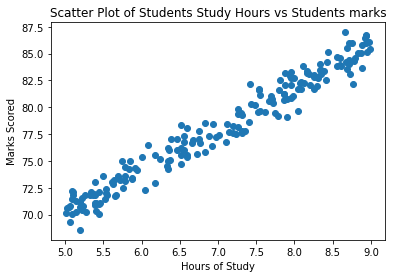

In [7]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Hours of Study")
plt.ylabel("Marks Scored")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

In [8]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
df2 = df.fillna(df.mean())

In [10]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [11]:
df2.head(10)

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
5,7.550000,81.18
6,6.670000,76.99
7,8.990000,85.46
8,5.190000,70.66
9,6.750000,77.82


In [12]:
X = df2.drop("student_marks", axis = 1)
y = df2.drop("study_hours", axis = 1)
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


## Selecting the model and training the model.

In [14]:
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()
print("Linear Regression model loaded successfully")

Linear Regression model loaded successfully


In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
print (" Coffefficient is", lr.coef_, "\n Intercept is" ,lr.intercept_)

 Coffefficient is [[3.92640681]] 
 Intercept is [50.4383507]


In [17]:
# Manually checking the value using the below formula.
# y = m * x + C

m = 3.93
c = 50.44
y  = m * 10 + c 
print("Value of y using manual method is", round(y,2))

Value of y using manual method is 89.74


In [18]:
lr.predict([[10]])[0][0].round(2)

89.7

In [19]:
y_pred  = lr.predict(X_test)


In [20]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], 
             columns = ["study_hours", "marks_original","marks_predicted"])

,study_hours,marks_original,marks_predicted
0,6.09,76.48,74.350168
1,6.55,76.03,76.156315
2,8.13,82.27,82.360038
3,7.53,81.57,80.004194
4,6.38,77.01,75.488826
5,5.79,74.44,73.172246
6,8.25,82.79,82.831207
7,5.19,71.18,70.816402
8,5.39,73.02,71.601683
9,6.18,72.96,74.703545


In [21]:
print("LR score is ", lr.score(X_test,y_test))

LR score is  0.942580760104548


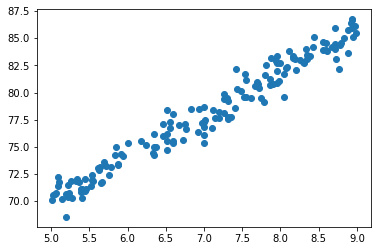

In [22]:
plt.scatter(X_train,y_train)

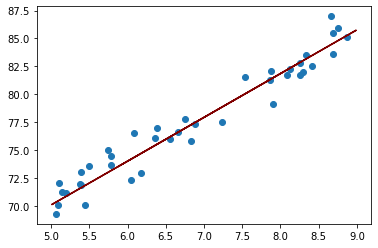

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "maroon")

In [24]:
import joblib
joblib.dump(lr, "marks-predict.pkl")

['marks-predict.pkl']

In [25]:
model = joblib.load("marks-predict.pkl")

In [28]:
round(model.predict([[5]])[0][0],3)

70.07